In [33]:
import seaborn as sns
import numpy as np
import pandas as pd

import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, FeatureAgglomeration
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

In [34]:
#TODO: Use another file than the preprocessed.pkl
with open('preprocessed.pkl', 'rb') as f:
    data = pickle.load(f)
    print(data)
    print(len(data))
    


      has_null  wave  gender   age  age_o  d_age  d_d_age  race  race_o  \
0            0   1.0       0  21.0   27.0    6.0        2     0       2   
1            0   1.0       0  21.0   22.0    1.0        0     0       2   
2            1   1.0       0  21.0   22.0    1.0        0     0       0   
3            0   1.0       0  21.0   23.0    2.0        1     0       2   
4            0   1.0       0  21.0   24.0    3.0        1     0       3   
...        ...   ...     ...   ...    ...    ...      ...   ...     ...   
8373         1  21.0       1  25.0   26.0    1.0        0     2       3   
8374         1  21.0       1  25.0   24.0    1.0        0     2       4   
8375         1  21.0       1  25.0   29.0    4.0        2     2       3   
8376         1  21.0       1  25.0   22.0    3.0        1     2       0   
8377         1  21.0       1  25.0   22.0    3.0        1     2       0   

      samerace  ...  d_expected_num_interested_in_me  d_expected_num_matches  \
0            0  ...

#### Show correlation between self-reported scores and scores given by the opponent 

In [1]:
self_rated_features = ['attractive', 'sincere', 'intelligence', 'funny', 'ambition']
average_columns = [ 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o']
group_by_columns = ['gender', 'age', 'race', 'field', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']

def compare_ratings(data):
    combined_df = (
    data.groupby(group_by_columns, as_index=False)
    [average_columns].mean()
    )
    reduced_df = combined_df[self_rated_features + average_columns]
    
    corr_attractive = reduced_df[['attractive', 'attractive_o']].corr()
    corr_sincere = reduced_df[['sincere', 'sinsere_o']].corr()
    corr_intelligence = reduced_df[['intelligence', 'intelligence_o']].corr()
    corr_funny = reduced_df[['funny', 'funny_o']].corr()
    corr_ambition = reduced_df[['ambition', 'ambitous_o']].corr()
    
    print(corr_attractive)
    print(corr_sincere)
    print(corr_funny)
    print(corr_ambition)
    print(corr_intelligence)
    
    sns.scatterplot(reduced_df, x="attractive_o", y="attractive")
    sns.scatterplot(reduced_df, x="sinsere_o", y="sincere")
    sns.scatterplot(reduced_df, x="intelligence_o", y="intelligence")
    sns.scatterplot(reduced_df, x="funny_o", y="funny")
    sns.scatterplot(reduced_df, x="ambitous_o", y="ambition")  
   
    
compare_ratings(data)     
    

NameError: name 'data' is not defined

In [36]:
def remove_relational_data(data):
    data = data[['gender', 'age', 'race', 'field', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'shared_interests_o']]
    return data

data = remove_relational_data(data)    

In [37]:
combined_df = (
    data.groupby(group_by_columns, as_index=False)
    [average_columns].mean()
)

In [38]:
# Select women
combined_df = combined_df.loc[combined_df['gender'] == 0]

# Select men
#combined_df = combined_df.loc[combined_df['gender'] == 1]

In [39]:
#Remove categorical values
features = combined_df.drop(labels=['race', 'field'], axis=1)

# Normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

35


### Feature Agglomeration

In [ ]:
fa = FeatureAgglomeration()
nf = normalized_features

nf = fa.fit_transform(nf)


### K-means - Partitional Clustering Techniques

#### Initialize Kmeans with 1 k

In [40]:
# Set the number of clusters
k = 3  

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans.fit(normalized_features)

# Get cluster labels
combined_df['cluster'] = kmeans.labels_

In [41]:
print(combined_df.head())

# Group data by clusters to understand the characteristics of each cluster
cluster_summary = combined_df.groupby('cluster').mean()
print(cluster_summary)

   gender   age  race  field  attractive_important  sincere_important  \
0       0  19.0     3    175                  50.0               15.0   
1       0  20.0     1     61                  20.0               20.0   
2       0  20.0     3     76                  10.0               10.0   
3       0  20.0     4    193                  15.0               15.0   
4       0  21.0     0      6                  30.0                5.0   

   intellicence_important  funny_important  ambtition_important  \
0                    10.0             10.0                 10.0   
1                    20.0             20.0                 10.0   
2                    35.0             35.0                  8.0   
3                    20.0             25.0                 10.0   
4                    30.0             15.0                 15.0   

   shared_interests_important  ...  concerts  music  shopping  yoga  \
0                         5.0  ...      10.0   10.0       7.0   8.0   
1               

#### Use PCA to visualize the results

In [2]:
# Reduce to 2 dimensions for visualization
n_components = 2
pca = PCA(n_components=n_components)
reduced_features = pca.fit_transform(normalized_features)
print('Cumulative variance explained by {} principal components: {:.2%}'.format(n_components, np.sum(pca.explained_variance_ratio_)))


# Plot the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

NameError: name 'PCA' is not defined

In [43]:
# Results from pca.components_
dataset_pca = pd.DataFrame(abs(pca.components_), columns=features.columns, index=['PC_1', 'PC_2'])
    #, 'PC_3', 'PC_4', 'PC_5', 'PC_6'])
print('\n\n', dataset_pca)
    



             gender       age  attractive_important  sincere_important  \
PC_1  6.575218e-18  0.020940              0.074340           0.056538   
PC_2  7.897444e-18  0.140354              0.113763           0.133769   
PC_3  7.763980e-18  0.251921              0.213196           0.201115   
PC_4  2.919198e-18  0.052440              0.181268           0.288575   
PC_5  6.888121e-18  0.234648              0.224879           0.124710   
PC_6  7.872381e-18  0.025962              0.411999           0.124241   

      intellicence_important  funny_important  ambtition_important  \
PC_1                0.008785         0.013990             0.070582   
PC_2                0.027192         0.092816             0.076010   
PC_3                0.081421         0.004902             0.147931   
PC_4                0.229656         0.007036             0.032899   
PC_5                0.095971         0.153787             0.100580   
PC_6                0.054048         0.050105             0.50334

#### Initialize Kmeans over a set of parameters

Parameter: {'n_clusters': 2, 'n_init': 'auto'} Score 0.5550136359379801
Parameter: {'n_clusters': 3, 'n_init': 'auto'} Score 0.4589350788370592
Parameter: {'n_clusters': 4, 'n_init': 'auto'} Score 0.425500485777446
Parameter: {'n_clusters': 5, 'n_init': 'auto'} Score 0.3917563265599712
Parameter: {'n_clusters': 6, 'n_init': 'auto'} Score 0.3203118918800236
Parameter: {'n_clusters': 7, 'n_init': 'auto'} Score 0.3397536267814396
Parameter: {'n_clusters': 8, 'n_init': 'auto'} Score 0.22153379217473695
Parameter: {'n_clusters': 9, 'n_init': 'auto'} Score 0.1916189894039377
Parameter: {'n_clusters': 10, 'n_init': 'auto'} Score 0.18831779269257393
Parameter: {'n_clusters': 11, 'n_init': 'auto'} Score 0.2134615812938303
Parameter: {'n_clusters': 12, 'n_init': 'auto'} Score 0.1865381466209976
Parameter: {'n_clusters': 13, 'n_init': 'auto'} Score 0.1670917695813396
Parameter: {'n_clusters': 14, 'n_init': 'auto'} Score 0.16491011076352483


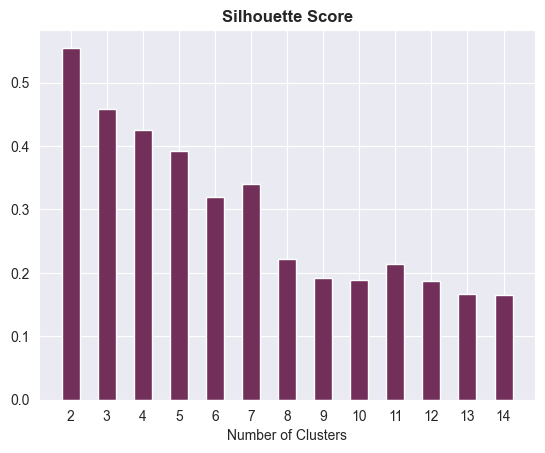

In [44]:
distortions = []
inertias = []

mapping1= {}
mapping2= {}

parameters = range(2,15)

# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters, 'n_init': ['auto']})
best_score = -1

kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(combined_df)          
    ss = silhouette_score(combined_df, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    distortions.append(sum(np.min(cdist(combined_df, kmeans_model.cluster_centers_, 'euclidean'), axis=1)**2) / combined_df.shape[0])
    
    # Inertia is calculated directly by KMeans
    inertias.append(kmeans_model.inertia_)
    
    # Store the mappings for easy access
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]
    # check p which has the best score
    
    if ss > best_score:
        best_score = ss
        best_grid = p
        
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

Distortion values:
3 : 374.7728330416691


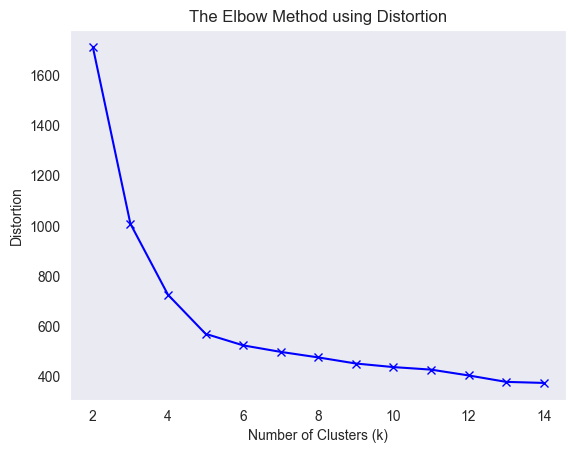

In [45]:
print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')
# Plotting the graph of k versus Distortion
plt.plot(parameters, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.grid()
plt.show()

Inertia values:
3 : 101563.43775429233


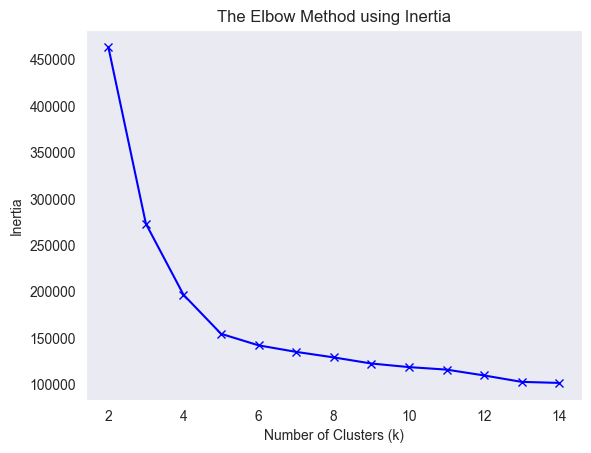

In [46]:
print("Inertia values:")
for key, val in mapping2.items():
    print(f'{key} : {val}')
# Plotting the graph of k versus Inertia
plt.plot(parameters, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.grid()
plt.show()

### Hierarchical Clustering

Parameter: {'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 2} Score 0.5216099468362613
Parameter: {'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 3} Score 0.4478849009629258
Parameter: {'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 4} Score 0.34942991601450346
Parameter: {'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 5} Score 0.3224162519078716
Parameter: {'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 10} Score 0.20794855076997923
Parameter: {'linkage': 'complete', 'metric': 'euclidean', 'n_clusters': 2} Score 0.5498113303587413
Parameter: {'linkage': 'complete', 'metric': 'euclidean', 'n_clusters': 3} Score 0.4520088841987982
Parameter: {'linkage': 'complete', 'metric': 'euclidean', 'n_clusters': 4} Score 0.4130149105467183
Parameter: {'linkage': 'complete', 'metric': 'euclidean', 'n_clusters': 5} Score 0.3713576618935388
Parameter: {'linkage': 'complete', 'metric': 'euclidean', 'n_clusters': 10} Score 0.26504559444837594
Parameter: {'li

ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of labels (5).

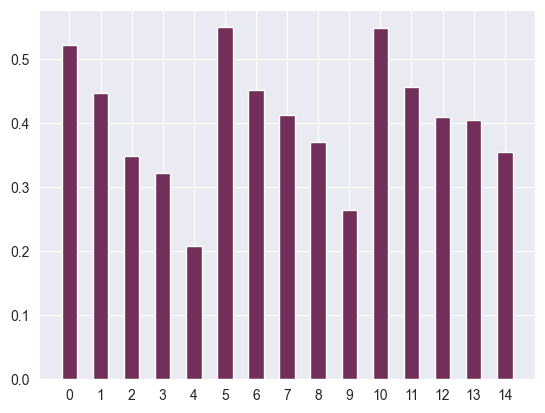

In [51]:
# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 10]

#parameters = range(2,15)
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters, 'metric': ['euclidean'], 'linkage':['ward', 'complete', 'average']})
best_score = -1
agglom = AgglomerativeClustering()    
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    agglom.set_params(**p)    # set current hyper parameter
    agglom.fit(combined_df)          
    ss = silhouette_score(combined_df, agglom.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    

    # check p which has the best score
    
    if ss > best_score:
        best_score = ss
        best_grid = p
        
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()